## Exploratory Data Analysis for CVRPTW extracted instance features

###  Instances Analysis

#### Solomon Instances Analysis

In [49]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [50]:
df = pd.read_csv("solomon_features.csv")

<Axes: >

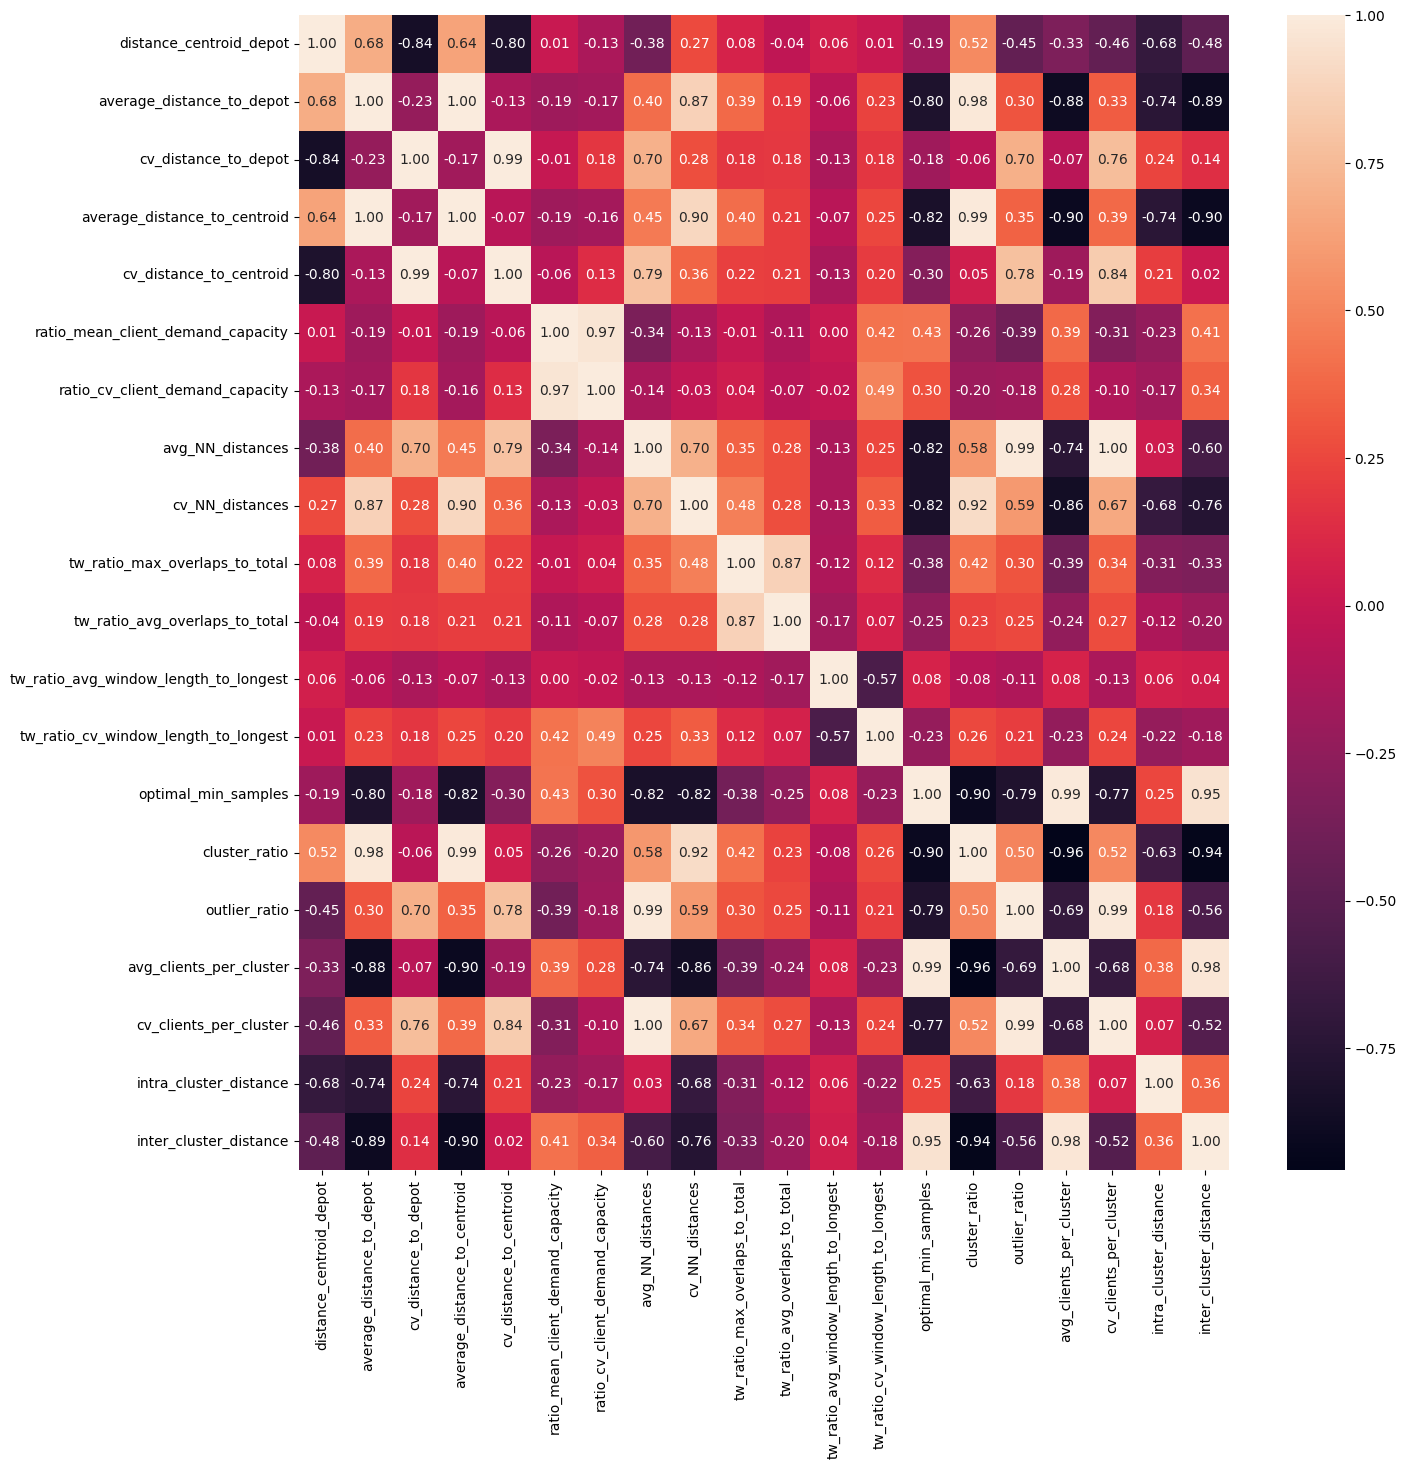

In [51]:
df2 = df.drop(["instance","client_number","average_clients_per_vehicle"],axis=1)
corr = df2.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(corr, annot=True, ax=ax, fmt=".2f")

/home/ton/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


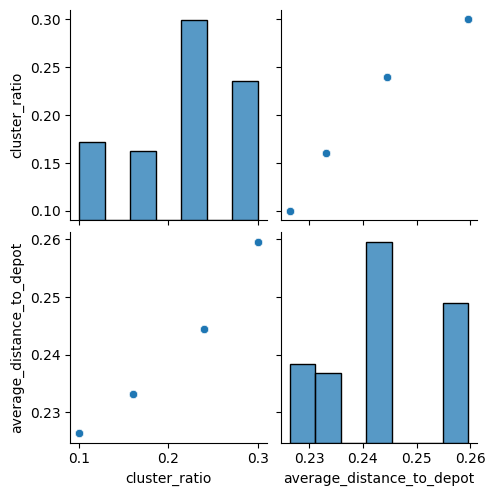

In [37]:
# Pairplot for selected columns
sns.pairplot(df[["cluster_ratio","average_distance_to_depot"]])
plt.show()

/home/ton/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


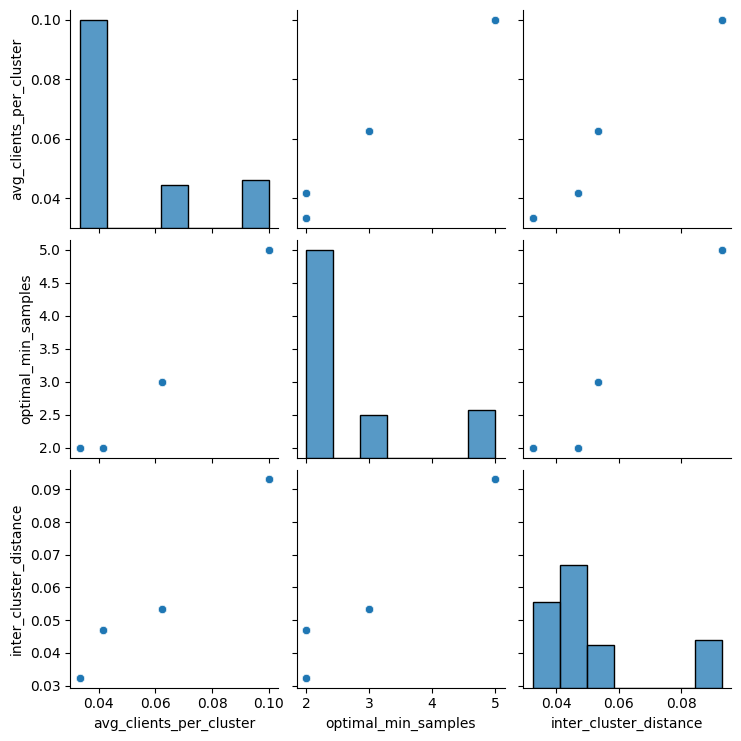

In [53]:
# Pairplot for selected columns
sns.pairplot(df[["avg_clients_per_cluster","optimal_min_samples","inter_cluster_distance"]])
plt.show()

#### Homberger Instances Analysis

In [38]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [39]:
df_homberger = pd.read_csv("Homberger_features.csv")
df_homberger.head()

,instance,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,average_distance_to_centroid,cv_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,average_clients_per_vehicle,...,tw_ratio_avg_overlaps_to_total,tw_ratio_avg_window_length_to_longest,tw_ratio_cv_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,C1_4_4.txt,400.0,0.0582,0.2806,0.1180,0.2744,0.1211,0.0899,0.2166,4.0,...,0.73,0.73,0.04,6,0.0950,0.045,0.0263,0.0007,0.0210,0.0392
1,C1_10_6.txt,1000.0,0.0381,0.2868,0.0523,0.2842,0.0529,0.0897,0.2218,4.0,...,0.11,0.37,0.12,7,0.0910,0.043,0.0110,0.0004,0.0096,0.0208
2,R1_4_8.txt,400.0,0.0141,0.2594,0.1318,0.2591,0.1319,0.0889,0.2338,4.0,...,0.69,0.69,0.07,2,0.2725,0.165,0.0092,0.0042,0.0136,0.0218
3,C2_10_7.txt,1000.0,0.0223,0.2407,0.0542,0.2390,0.0556,0.0274,0.0625,4.0,...,0.17,0.40,0.03,27,0.0170,0.126,0.0588,0.0006,0.0434,0.0614
4,C1_4_1.txt,400.0,0.0582,0.2806,0.1180,0.2744,0.1211,0.0899,0.2166,4.0,...,0.05,0.68,0.19,6,0.0950,0.045,0.0263,0.0007,0.0210,0.0392


<Axes: >

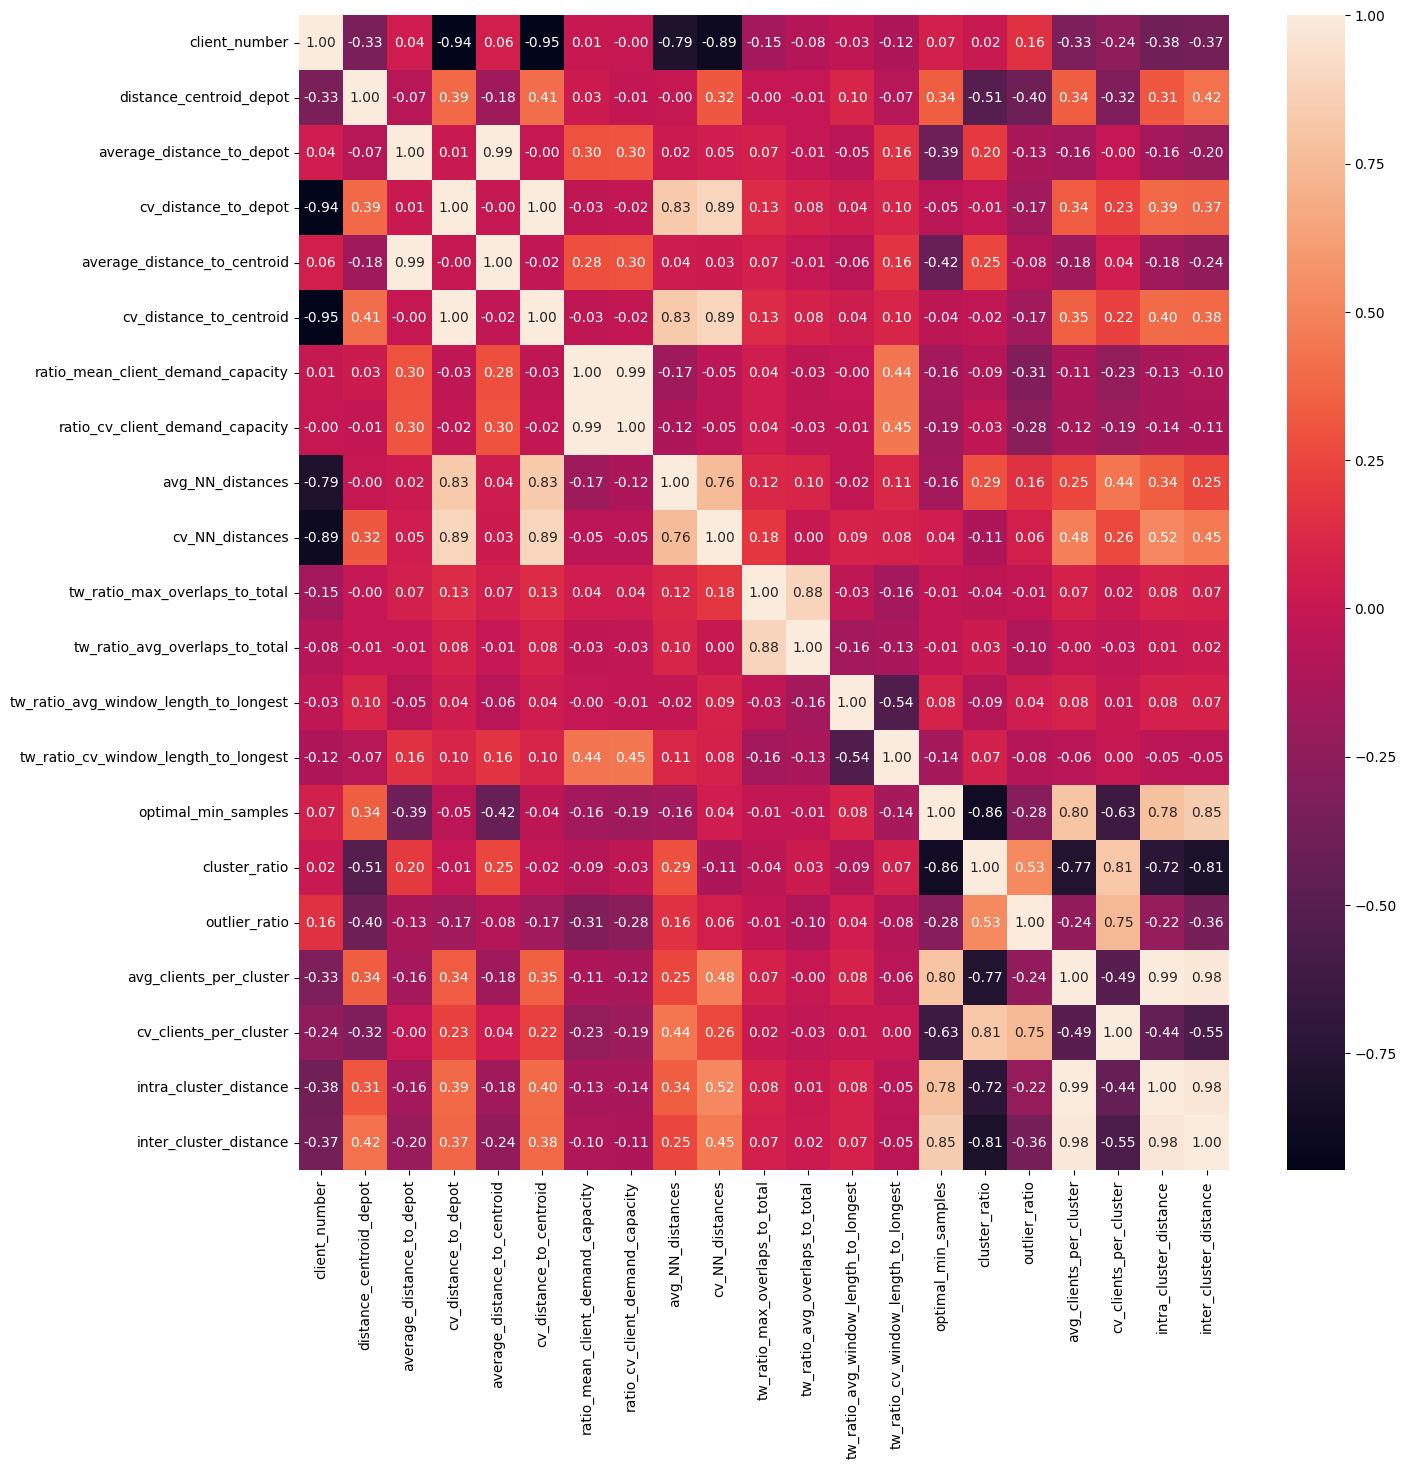

In [40]:
df2_homberger = df_homberger.drop(["instance","average_clients_per_vehicle"],axis=1)
corr = df2_homberger.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(corr, annot=True, ax=ax,fmt=".2f")

/home/ton/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


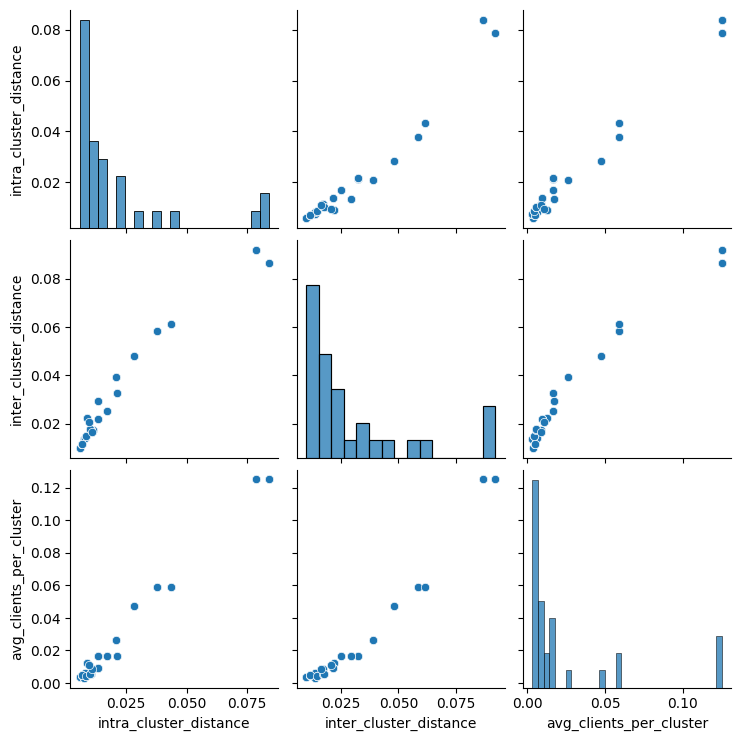

In [16]:
# Pairplot for selected columns
sns.pairplot(df2_homberger[["intra_cluster_distance","inter_cluster_distance","avg_clients_per_cluster"]])
plt.show()

/home/ton/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


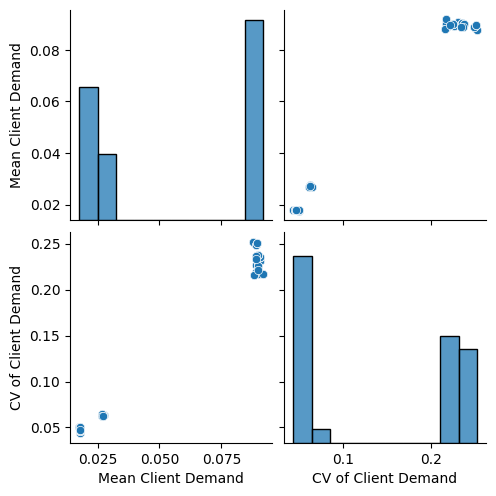

In [63]:
# Pairplot for selected columns

df_plot = df2_homberger[["ratio_mean_client_demand_capacity","ratio_cv_client_demand_capacity"]]
df_plot.columns = ["Mean Client Demand","CV of Client Demand"]
plot = sns.pairplot(df_plot)
plt.show()

#### Solomon + Homberger Analysis

In [46]:
df_homberger = pd.read_csv("Homberger_features.csv")
df_solomon = pd.read_csv("solomon_features.csv")
df = pd.concat([df_homberger,df_solomon],axis=0).reset_index(drop=True)
df

,instance,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,average_distance_to_centroid,cv_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,average_clients_per_vehicle,...,tw_ratio_avg_overlaps_to_total,tw_ratio_avg_window_length_to_longest,tw_ratio_cv_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,C1_4_4.txt,400.0,0.0582,0.2806,0.1180,0.2744,0.1211,0.0899,0.2166,4.0,...,0.73,0.73,0.04,6,0.0950,0.045,0.0263,0.0007,0.0210,0.0392
1,C1_10_6.txt,1000.0,0.0381,0.2868,0.0523,0.2842,0.0529,0.0897,0.2218,4.0,...,0.11,0.37,0.12,7,0.0910,0.043,0.0110,0.0004,0.0096,0.0208
2,R1_4_8.txt,400.0,0.0141,0.2594,0.1318,0.2591,0.1319,0.0889,0.2338,4.0,...,0.69,0.69,0.07,2,0.2725,0.165,0.0092,0.0042,0.0136,0.0218
3,C2_10_7.txt,1000.0,0.0223,0.2407,0.0542,0.2390,0.0556,0.0274,0.0625,4.0,...,0.17,0.40,0.03,27,0.0170,0.126,0.0588,0.0006,0.0434,0.0614
4,C1_4_1.txt,400.0,0.0582,0.2806,0.1180,0.2744,0.1211,0.0899,0.2166,4.0,...,0.05,0.68,0.19,6,0.0950,0.045,0.0263,0.0007,0.0210,0.0392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,R207.txt,100.0,0.0156,0.2444,0.3725,0.2441,0.3709,0.0146,0.0605,4.0,...,0.61,0.61,0.06,2,0.2400,0.390,0.0417,0.0177,0.0360,0.0471
352,C108.txt,100.0,0.0212,0.2264,0.3323,0.2268,0.3198,0.0905,0.2863,4.0,...,0.22,0.69,0.05,5,0.1000,0.000,0.1000,0.0016,0.0351,0.0930
353,R204.txt,100.0,0.0156,0.2444,0.3725,0.2441,0.3709,0.0146,0.0605,4.0,...,0.76,0.76,0.05,2,0.2400,0.390,0.0417,0.0177,0.0360,0.0471
354,RC106.txt,100.0,0.0436,0.2596,0.3019,0.2565,0.3009,0.0862,0.2718,4.0,...,0.27,1.00,0.00,2,0.3000,0.180,0.0333,0.0086,0.0299,0.0324


<Axes: >

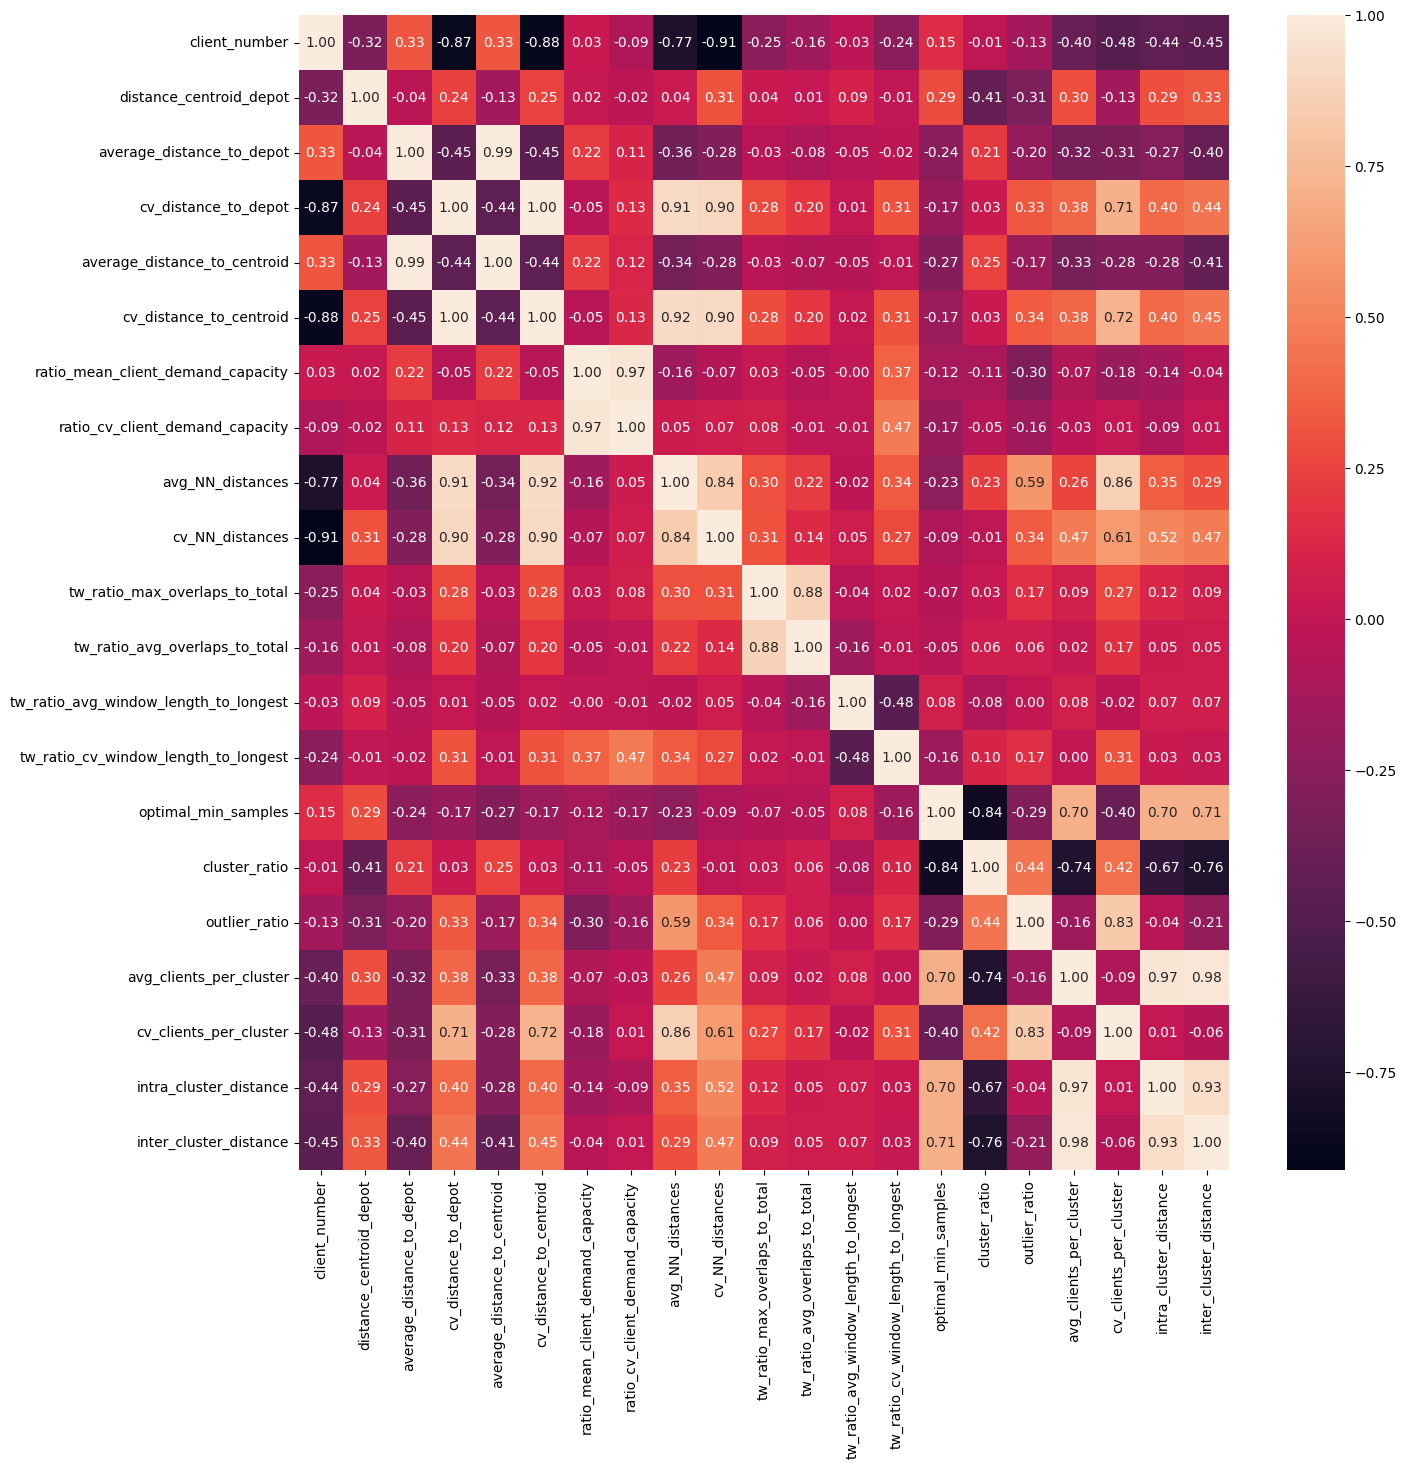

In [48]:
df_corr = df.drop(["instance","average_clients_per_vehicle"],axis=1)
corr = df_corr.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(corr, annot=True, ax=ax,fmt=".2f")

/home/ton/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


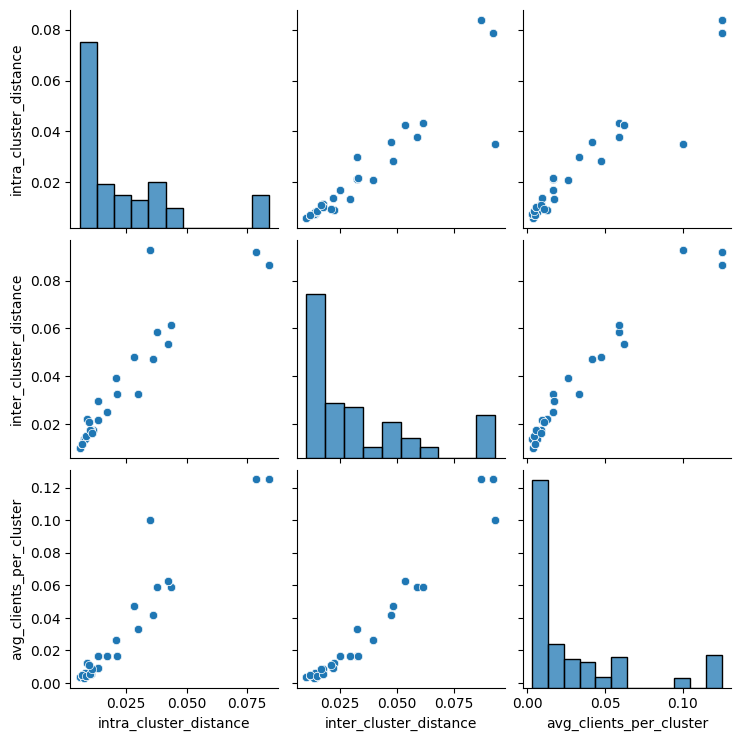

In [30]:
# Pairplot for selected columns
sns.pairplot(df[["intra_cluster_distance","inter_cluster_distance","avg_clients_per_cluster"]])
plt.show()

### Training a neural net to predict parameters from extracted features

#### Data preprocessing

In [35]:
# Hacemos el match entre las caracteristicas de cada instancia y sus parametros obtenidos con paramILS
df_with_params = df
f = open("solomonExecution/best_params_20_1000.csv","r")

params = pd.DataFrame(columns= f.readline().strip().split(",")[2:8])
for line in f:
    line = line.strip().split(",")
    params.loc[len(params.index)] = [line[2] + ".txt"] + [float(i) for i in line[3:8]]
f.close()

df_with_params = df_with_params.merge(params,on=["instance"])
df_with_params.head()

,instance,client_number,distance_centroid_depot,average_distance_to_depot,std_distance_to_depot,average_distance_to_centroid,std_distance_to_centroid,average_demand,std_demand,ratio_total_demand_to_capacity,...,area_enclosing_rectangle,ratio_tw_max_overlaps_to_total,ratio_tw_avg_overlaps_to_total,ratio_tw_avg_window_length_to_longest,ratio_tw_std_window_length_to_longest,gs,nc,ne,ps,xi
0,R106.txt,100,1.592608,24.947113,9.484806,24.915976,9.432802,14.58,8.826302,7.290000,...,4810,0.53,0.34,0.35,0.35,10.0,0.1,0.4,25.0,0.4
1,R208.txt,100,1.592608,24.947113,9.484806,24.915976,9.432802,14.58,8.826302,1.458000,...,4810,0.90,0.80,0.80,0.32,20.0,0.6,0.4,35.0,0.6
2,C207.txt,100,3.102209,29.714058,11.519755,29.620094,11.342677,18.10,10.362915,2.585714,...,7600,0.25,0.19,0.49,0.24,10.0,0.1,0.4,25.0,0.6
3,RC206.txt,100,5.560728,33.087715,12.734721,32.692598,12.539632,17.24,9.370293,1.724000,...,7790,0.45,0.25,1.00,0.00,10.0,0.1,0.4,25.0,0.4
4,R110.txt,100,1.592608,24.947113,9.484806,24.915976,9.432802,14.58,8.826302,7.290000,...,4810,0.76,0.41,0.49,0.22,10.0,0.1,0.2,45.0,0.4


In [44]:
f = open("hombergerExecution/best_params_10_1000.csv")
params = pd.DataFrame(columns= f.readline().strip().split(",")[2:8])
for line in f:
    line = line.strip().split(",")
    params.loc[len(params.index)] = [line[2] + ".txt"] + [float(i) for i in line[3:8]]
f.close()

params

,instance,gs,nc,ne,ps,xi
0,RC1.txt,20.0,0.4,0.2,5.0,0.2
1,RC2.txt,10.0,0.6,0.4,5.0,0.8
2,C2.txt,70.0,0.8,0.4,15.0,0.6
3,RC2.txt,10.0,0.2,0.6,5.0,0.4
4,C2.txt,10.0,0.8,0.6,5.0,0.2
...,...,...,...,...,...,...
295,RC2.txt,10.0,0.6,0.4,15.0,0.4
296,RC1.txt,10.0,0.8,0.4,5.0,0.4
297,RC2.txt,10.0,0.2,0.2,35.0,0.8
298,C1.txt,10.0,0.8,0.2,5.0,0.2


In [74]:
from sklearn import preprocessing

X = df_with_params.drop(["instance"],axis=1)
Y = X[X.columns[-5:]]
X = X[X.columns[:-5]]

#Normalizamos X
scaler_X = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_normalized = scaler_X.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized,columns=X.columns)

#Normalizamos Y
scaler_Y = preprocessing.MinMaxScaler(feature_range=(-1,1))
Y_normalized = scaler_Y.fit_transform(Y)
Y_normalized = pd.DataFrame(Y_normalized,columns=Y.columns)

In [75]:
X_normalized.head()

,client_number,distance_centroid_depot,average_distance_to_depot,std_distance_to_depot,average_distance_to_centroid,std_distance_to_centroid,average_demand,std_demand,ratio_total_demand_to_capacity,ratio_largest_demand_to_capacity,ratio_median_demand_to_capacity,number_of_vehicles,average_clients_per_vehicle,area_enclosing_rectangle,ratio_tw_max_overlaps_to_total,ratio_tw_avg_overlaps_to_total,ratio_tw_avg_window_length_to_longest,ratio_tw_std_window_length_to_longest
0,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,0.536354,0.571429,0.552239,-1.0,-1.0,-1.000000,-0.032967,-0.226667,-0.805556,0.489362
1,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-0.990476,-1.000000,-1.0,-1.0,-1.000000,0.780220,1.000000,0.444444,0.361702
2,-1.0,-0.239136,0.171153,0.252309,0.20981,0.229468,1.000000,1.00000,-0.702920,-0.700680,-0.961620,-1.0,-1.0,0.872483,-0.648352,-0.626667,-0.416667,0.021277
3,-1.0,1.000000,1.000000,1.000000,1.00000,1.000000,0.511364,-0.29196,-0.929926,-1.000000,-0.910448,-1.0,-1.0,1.000000,-0.208791,-0.466667,1.000000,-1.000000
4,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,0.536354,0.571429,0.552239,-1.0,-1.0,-1.000000,0.472527,-0.040000,-0.416667,-0.063830


#### Building a simple, overfitted neural network

In [76]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
model = Sequential()
model.add(Dense(200, input_shape=(18,), activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(5, activation='linear'))

optimizer = AdamW(learning_rate=0.003)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error',"accuracy"])

# Train the model with early stopping
history = model.fit(X_normalized, Y_normalized, epochs=2000, batch_size=1, verbose=True)

model.evaluate(X_normalized)

Epoch 1/2000
56/56 [==============================] - 1s 2ms/step - loss: 0.3884 - mean_squared_error: 0.3884 - accuracy: 0.3750
Epoch 2/2000
56/56 [==============================] - 0s 4ms/step - loss: 0.3506 - mean_squared_error: 0.3506 - accuracy: 0.5000
Epoch 3/2000
56/56 [==============================] - 0s 1ms/step - loss: 0.3218 - mean_squared_error: 0.3218 - accuracy: 0.5714
Epoch 4/2000
56/56 [==============================] - 0s 1ms/step - loss: 0.3216 - mean_squared_error: 0.3216 - accuracy: 0.5000
Epoch 5/2000
56/56 [==============================] - 0s 1ms/step - loss: 0.3153 - mean_squared_error: 0.3153 - accuracy: 0.5714
Epoch 6/2000
56/56 [==============================] - 0s 2ms/step - loss: 0.3077 - mean_squared_error: 0.3077 - accuracy: 0.5536
Epoch 7/2000
56/56 [==============================] - 0s 3ms/step - loss: 0.3197 - mean_squared_error: 0.3197 - accuracy: 0.6250
Epoch 8/2000
56/56 [==============================] - 0s 2ms/step - loss: 0.3044 - mean_squared_e

[0.0, 0.0, 0.0]

#### Testing predictions

In [78]:
X_normalized.head()

,client_number,distance_centroid_depot,average_distance_to_depot,std_distance_to_depot,average_distance_to_centroid,std_distance_to_centroid,average_demand,std_demand,ratio_total_demand_to_capacity,ratio_largest_demand_to_capacity,ratio_median_demand_to_capacity,number_of_vehicles,average_clients_per_vehicle,area_enclosing_rectangle,ratio_tw_max_overlaps_to_total,ratio_tw_avg_overlaps_to_total,ratio_tw_avg_window_length_to_longest,ratio_tw_std_window_length_to_longest
0,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,0.536354,0.571429,0.552239,-1.0,-1.0,-1.000000,-0.032967,-0.226667,-0.805556,0.489362
1,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-0.990476,-1.000000,-1.0,-1.0,-1.000000,0.780220,1.000000,0.444444,0.361702
2,-1.0,-0.239136,0.171153,0.252309,0.20981,0.229468,1.000000,1.00000,-0.702920,-0.700680,-0.961620,-1.0,-1.0,0.872483,-0.648352,-0.626667,-0.416667,0.021277
3,-1.0,1.000000,1.000000,1.000000,1.00000,1.000000,0.511364,-0.29196,-0.929926,-1.000000,-0.910448,-1.0,-1.0,1.000000,-0.208791,-0.466667,1.000000,-1.000000
4,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,0.536354,0.571429,0.552239,-1.0,-1.0,-1.000000,0.472527,-0.040000,-0.416667,-0.063830


In [79]:
# Predictions on the whole dataset
preds = model.predict(X_normalized)

2/2 [==============================] - 0s 3ms/step


In [80]:
predicted_params = pd.DataFrame(scaler_Y.inverse_transform(preds),columns=params.drop(["instance"],axis=1).columns)
predicted_params["gs"] = predicted_params["gs"].astype(int)
predicted_params["ps"] = predicted_params["ps"].astype(int)
predicted_params = predicted_params.round(2)
predicted_params.head()

,gs,nc,ne,ps,xi
0,9,0.1,0.40,25,0.39
1,19,0.6,0.41,34,0.61
2,10,0.1,0.40,24,0.60
3,9,0.1,0.40,25,0.40
4,9,0.1,0.20,44,0.40


In [83]:
params.head()

,instance,gs,nc,ne,ps,xi
0,R110.txt,10.0,0.1,0.2,45.0,0.4
1,R105.txt,10.0,0.1,0.4,25.0,0.6
2,C106.txt,10.0,0.1,0.4,25.0,0.6
3,R104.txt,20.0,0.4,0.1,45.0,0.4
4,C207.txt,10.0,0.1,0.4,25.0,0.6


In [82]:
error_df = params - predicted_params
error_df.median()

gs          1.000000e+00
instance             NaN
nc         -1.490116e-09
ne         -5.960464e-09
ps          1.000000e+00
xi         -2.384186e-08
dtype: float64

#### Using K Fold Cross Validation

In [63]:

# Convert X_normalized and Y_normalized to numpy arrays if they are DataFrames
X_normalized = X_normalized.values if isinstance(X_normalized, pd.DataFrame) else X_normalized
Y_normalized = Y_normalized.values if isinstance(Y_normalized, pd.DataFrame) else Y_normalized

# Define the number of folds
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store results
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Initialize early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Loop over the folds
i = 0
for train_index, val_index in kf.split(X_normalized):
    print("Training model number " + str(i))
    X_train, X_val = X_normalized[train_index], X_normalized[val_index]
    Y_train, Y_val = Y_normalized[train_index], Y_normalized[val_index]

    model = Sequential()
    model.add(Dense(10, input_shape=(18,), activation='sigmoid'))
    #model.add(Dense(50, activation='sigmoid'))
    #model.add(Dense(25, activation='sigmoid'))
    model.add(Dense(5, activation='linear'))

    optimizer = AdamW(learning_rate=0.005)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

    # Train the model with early stopping
    history = model.fit(X_train, Y_train, epochs=500, batch_size=1, verbose=False, 
                        validation_data=(X_val, Y_val), callbacks=[early_stopping])

    # Evaluate the model on the training set
    train_loss, train_accuracy = model.evaluate(X_train, Y_train)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_val, Y_val)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print("Train Loss: " + str(train_loss) + " Validation Loss: " + str(val_loss))
    i += 1

# Calculate and print the average results over all folds
avg_train_loss = np.mean(train_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_loss = np.mean(val_losses)
avg_val_accuracy = np.mean(val_accuracies)

print(f"Avg Training Loss: {avg_train_loss}")
print(f"Avg Validation Loss: {avg_val_loss}")


Training model number 0
1/1 [==============================] - 0s 17ms/step - loss: 0.2132 - mean_squared_error: 0.2132
Train Loss: 0.24637848138809204 Validation Loss: 0.21315793693065643
Training model number 1
1/1 [==============================] - 0s 16ms/step - loss: 0.3383 - mean_squared_error: 0.3383
Train Loss: 0.221817746758461 Validation Loss: 0.3383161127567291
Training model number 2
1/1 [==============================] - 0s 19ms/step - loss: 0.4210 - mean_squared_error: 0.4210
Train Loss: 0.23818062245845795 Validation Loss: 0.42100605368614197
Training model number 3
1/1 [==============================] - 0s 18ms/step - loss: 0.1405 - mean_squared_error: 0.1405
Train Loss: 0.2823718190193176 Validation Loss: 0.14054222404956818
Training model number 4
1/1 [==============================] - 0s 18ms/step - loss: 0.2226 - mean_squared_error: 0.2226
Train Loss: 0.24715812504291534 Validation Loss: 0.22256414592266083
Training model number 5
1/1 [==============================